# Cuantización de Colores con K Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Recuperar la imagen

In [2]:
imagen_arreglo = mpimg.imread('palm_trees.jpg')

In [3]:
# Imagen de 1401 píxeles de alto
# con 934 píxeles de ancho y
# 3 canales (R G B) (Rojo Verde Azúl)
imagen_arreglo.shape

(1401, 934, 3)

In [4]:
#Pixel(0,0)
imagen_arreglo[0][0]

array([ 25,  89, 127], dtype=uint8)

In [5]:
#Pixel(1400,933)
imagen_arreglo[1400][933]

array([10, 10, 12], dtype=uint8)

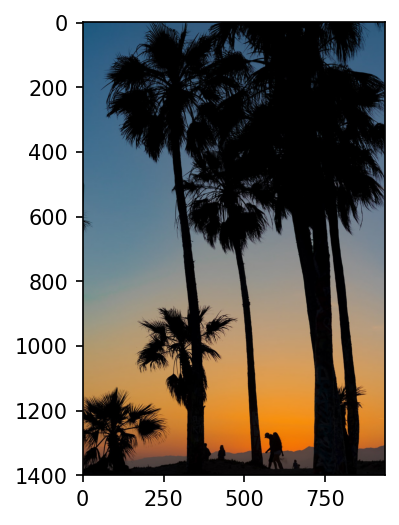

In [6]:
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(imagen_arreglo)

### Uso de K Means para la Cuantización de colores
Significa reducir el número de colores únicos a una cantidad de K colores. Para el ejemplo tomaremos un K = 5

In [7]:
# al = alto
# an = ancho
# ca = canales
(al,an,ca) = imagen_arreglo.shape

Conversión de la dimensión de la matriz de imagen de 3d a 2d usando (al,an,ca) --> (h*w,c)

In [8]:
imagen_arreglo_2d = imagen_arreglo.reshape(al*an,ca)

In [9]:
# Se tiene 1 308 534 píxeles
imagen_arreglo_2d.shape

(1308534, 3)

In [10]:
from sklearn.cluster import KMeans

In [11]:
modelo = KMeans(n_clusters=5)

In [12]:
modelo.fit(imagen_arreglo_2d)

KMeans(n_clusters=5)

In [13]:
etiquetas = modelo.predict(imagen_arreglo_2d)

In [14]:
etiquetas

array([2, 2, 2, ..., 1, 1, 1])

In [15]:
# Centroides del modelo (Colores)
modelo.cluster_centers_

array([[213.69549324, 142.22596404,  64.01415245],
       [  2.77738744,   2.59302727,   3.71603573],
       [ 77.83208914, 113.80368607, 139.81658828],
       [158.06284212, 149.54060472, 134.93174642],
       [ 67.16631977,  62.21433344,  63.24489927]])

In [17]:
codigos_rgb = modelo.cluster_centers_.round(0).astype(int)

In [18]:
codigos_rgb

array([[214, 142,  64],
       [  3,   3,   4],
       [ 78, 114, 140],
       [158, 150, 135],
       [ 67,  62,  63]])

In [20]:
nueva_imagen = np.reshape(codigos_rgb[etiquetas],(al,an,ca))

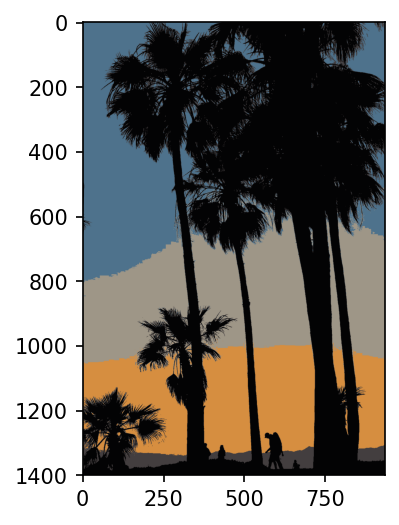

In [21]:
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(nueva_imagen)

In [23]:
plt.imsave("nueva_imagen.jpg",np.uint8(nueva_imagen))